### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [3]:
# Importing
import pandas as pd 
import matplotlib.pyplot as pds
%matplotlib inline

In [4]:
data_frame = pd.read_csv('The E-commerce Dataset.csv')
data_frame.info()
data_frame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       20000 non-null  int64  
 1   timestamp    20000 non-null  int64  
 2   review       20000 non-null  object 
 3   item         20000 non-null  object 
 4   rating       19983 non-null  float64
 5   helpfulness  19978 non-null  float64
 6   gender       19973 non-null  object 
 7   category     20000 non-null  object 
 8   item_id      20000 non-null  int64  
 9   item_price   20000 non-null  float64
 10  user_city    20000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.7+ MB


userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [5]:
print('Before removing data, length is: ' , len(data_frame))

Before removing data, length is:  20000


In [6]:
clean_data_frame = data_frame
count=0
for index, row in data_frame.iterrows():
    if row['review'] == 'none':
        clean_data_frame = clean_data_frame.drop([index])
        count+=1
print(count)

clean_data_frame_new = clean_data_frame.dropna()
print('After removing none data, length is: ' , len(clean_data_frame))
print('After removing missing data, length is: ' , len(clean_data_frame_new))
    

18
After removing none data, length is:  19982
After removing missing data, length is:  19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [7]:
#Question 2 Part 1
uniuser_num = clean_data_frame_new['userId'].unique()
print('Number of unique users are: ' , uniuser_num.size)

unireview_num = clean_data_frame_new['review'].unique()
print('Number of unique reviews are: ' , unireview_num.size)

uni_items_num = clean_data_frame_new['item'].unique()
print('Number of unique users are: ' , uni_items_num.size)

unicate_num = clean_data_frame_new['category'].unique()
print('Number of unique users are: ' , unicate_num.size)


Number of unique users are:  8562
Number of unique reviews are:  19459
Number of unique users are:  89
Number of unique users are:  9


In [8]:
#Question 2 Part 2
clean_data_frame_new['rating'].describe()


count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [9]:
#Question 2 part 3
diffgenders = clean_data_frame_new.groupby(['gender'])['item'].count().reset_index(name = 'count')
diffgenders.head()

,gender,count
0,F,9793
1,M,10123


In [10]:
diffgenders['count'].describe()

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: count, dtype: float64

In [11]:
# Question 2 part 4
diffratings = clean_data_frame_new.groupby(['item'])['rating'].count().reset_index(name = 'count')
diffratings.head()

,item,count
0,AOL (America Online),939
1,All Advantage,657
2,Alta Vista (by 1stUp),157
3,Amazon.com,240
4,American Airlines,185


In [12]:
diffratings['count'].describe()

count     89.000000
mean     223.775281
std      116.418988
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: count, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

(array([1, 2]), [Text(1, 0, 'F'), Text(2, 0, 'M')])

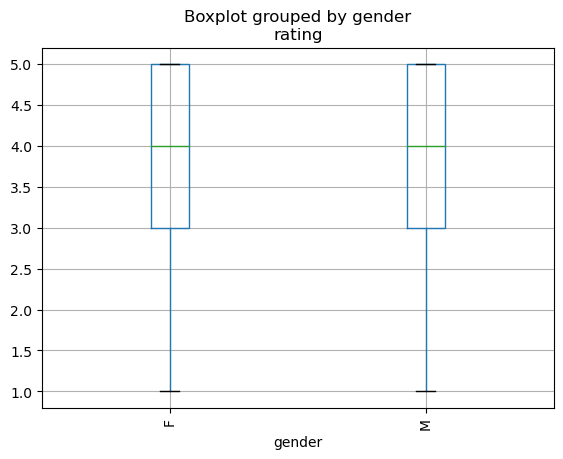

In [13]:
# Correlation between genders
clean_data_frame_new.boxplot("rating" , by="gender")
pds.xticks(rotation=90)

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, '0.0'),
  Text(2, 0, '1.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '3.0'),
  Text(5, 0, '4.0')])

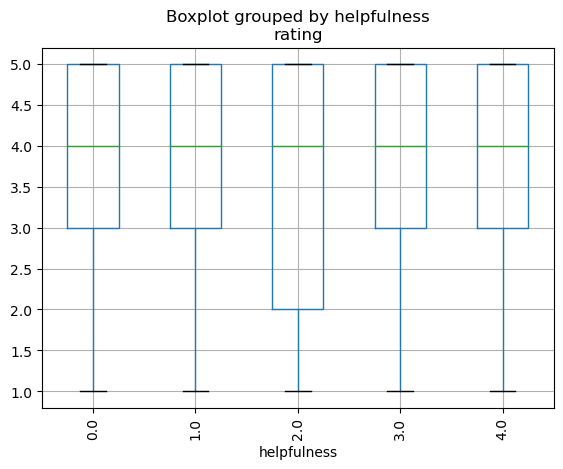

In [14]:
# Correlation for helpfulness between rating
clean_data_frame_new.boxplot("rating", by="helpfulness")
pds.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Books'),
  Text(2, 0, 'Games'),
  Text(3, 0, 'Hotels & Travel'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Media'),
  Text(6, 0, 'Movies'),
  Text(7, 0, 'Online Stores & Services'),
  Text(8, 0, 'Personal Finance'),
  Text(9, 0, 'Restaurants & Gourmet')])

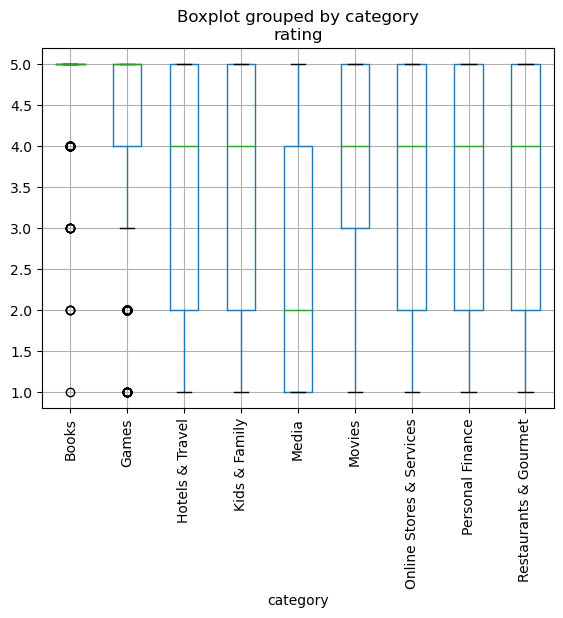

In [15]:
# Correlation between Category and Rating
clean_data_frame_new.boxplot("rating", by="category")
pds.xticks(rotation=90)

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [16]:
# Reviews of which the helpfulness is no more than 2
remove_outliers = clean_data_frame_new.drop(clean_data_frame_new.index[(clean_data_frame_new['helpfulness'] <= 2)])
print ('Length after removing helpfulness outliers: ' , len(remove_outliers))


Length after removing helpfulness outliers:  13643


In [35]:
#Users who rate less than 7 items
#part 1
find_users = remove_outliers.groupby(['userId'])['rating'].count().reset_index(name= 'count')
print('Number of users after removing outliers: ' , len(find_users))
find_users.head()

Number of users after removing outliers:  267


,userId,count
0,4,7
1,50,9
2,56,13
3,74,12
4,75,19


In [32]:
#part 2
usersInfo = find_users[find_users['count'] >= 7]['userId'].tolist()
print(len(usersInfo))

remove_outliers = remove_outliers[remove_outliers['userId'].isin(usersInfo)]
print('Length is: ' , len(remove_outliers))

267
Length is:  2741


In [37]:
#Items that receives less than 11 ratings
#part 1
findItems = remove_outliers.groupby(['item'])['rating'].count().reset_index(name = 'count')
findItems.head()

,item,count
0,AOL (America Online),93
1,All Advantage,72
2,Alta Vista (by 1stUp),10
3,Amazon.com,18
4,American Airlines,19


In [38]:
#part 2
itemsInfo = findItems[findItems['count'] >= 11]['item'].tolist()
print(len(itemsInfo))

82


In [39]:
#part 3
remove_outliers = remove_outliers[remove_outliers['item'].isin(itemsInfo)]
len(remove_outliers)

2685

In [41]:
# Export as csv file
remove_outliers.to_csv('A combined dataset from ecommerce dataset_cleaned_data.csv', index=False)